<a href="https://colab.research.google.com/github/Asm3515/Data-Analysis-US-UNI/blob/main/Plotly_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all the required Modules**

In [54]:
!pip install dash
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dash import dcc, html, Input, Output
import plotly.express as px
import scipy.stats as stats

**Import CSV's to colloborate data**

In [55]:
DF_National_Uni = pd.read_csv("/content/drive/MyDrive/Project3_Outlines/universities_updated.csv")

**Convert Upper lettercase to Lowercase**

In [116]:
DF_National_Uni['State'] = DF_National_Uni['State'].str.lower()
DF_National_Uni['City'] = DF_National_Uni['City'].str.lower()



In [57]:
state_mapping = {
    'AL': 'alabama',
    'AK': 'alaska',
    'AZ': 'arizona',
    'AR': 'arkansas',
    'CA': 'california',
    'CO': 'colorado',
    'CT': 'connecticut',
    'DE': 'delaware',
    'FL': 'florida',
    'GA': 'georgia',
    'HI': 'hawaii',
    'ID': 'idaho',
    'IL': 'illinois',
    'IN': 'indiana',
    'IA': 'iowa',
    'KS': 'kansas',
    'KY': 'kentucky',
    'LA': 'louisiana',
    'ME': 'maine',
    'MD': 'maryland',
    'MA': 'massachusetts',
    'MI': 'michigan',
    'MN': 'minnesota',
    'MS': 'mississippi',
    'MO': 'missouri',
    'MT': 'montana',
    'NE': 'nebraska',
    'NV': 'nevada',
    'NH': 'new hampshire',
    'NJ': 'new jersey',
    'NM': 'new mexico',
    'NY': 'new york',
    'NC': 'north carolina',
    'ND': 'north dakota',
    'OH': 'ohio',
    'OK': 'oklahoma',
    'OR': 'oregon',
    'PA': 'pennsylvania',
    'RI': 'rhode island',
    'SC': 'south carolina',
    'SD': 'south dakota',
    'TN': 'tennessee',
    'TX': 'texas',
    'UT': 'utah',
    'VT': 'vermont',
    'VA': 'virginia',
    'WA': 'washington',
    'WV': 'west virginia',
    'WI': 'wisconsin',
    'WY': 'wyoming'
}

In [58]:
DF_COST_LIV = pd.read_excel("/content/drive/MyDrive/Project3_Outlines/DAV Project#3/CostOfLivingIndex_cities.xlsx")
DF_COST_LIV['State'] = DF_COST_LIV['State'].map(state_mapping)
DF_COST_LIV['City'] = DF_COST_LIV['City'].str.lower()
DF_COST_LIV


,City,State,Cost of Living Index
0,abilene,texas,89.1
1,adrian,michigan,90.5
2,akron,ohio,89.4
3,alamogordo,new mexico,85.8
4,albany,georgia,87.3
...,...,...,...
505,wheeling,west virginia,84.1
506,new london,connecticut,105.9
507,daphne,alabama,96.6
508,victoria,texas,89.5


In [59]:
merged_df = pd.merge(DF_National_Uni,DF_COST_LIV, on=['City', 'State'], how='left')
merged_df.head()

,Unnamed: 0,index,Name,City,StateCode,Description,Tuition and fees,In-state,Undergrad Enrollment,State,Region,Type,Cost of Living Index
0,0,0,Princeton University,princeton,NJ,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402",new jersey,North East,Private,NaN
1,1,1,Harvard University,cambridge,MA,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,"6,699",massachusetts,North East,Private,NaN
2,2,2,University of Chicago,chicago,IL,"The University of Chicago, situated in Chicago...","$52,491",NaN,"5,844",illinois,Midwest,Private,100.1
3,3,3,Yale University,new haven,CT,"Yale University, located in New Haven, Connect...","$49,480",NaN,"5,532",connecticut,North East,Private,107.7
4,4,4,Columbia University,new york,NY,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,"6,102",new york,North East,Private,128.0


In [60]:
print(len(merged_df))
nan_count = merged_df['Cost of Living Index'].isna().sum()
print("Count of NaN values in 'Cost of Living Index':", nan_count)

223
Count of NaN values in 'Cost of Living Index': 84


In [61]:
state_mean = merged_df.groupby('State')['Cost of Living Index'].transform('mean')
merged_df['Cost of Living Index'] = merged_df['Cost of Living Index'].fillna(state_mean)
merged_df['Cost of Living Index'] = merged_df['Cost of Living Index'].fillna(100)
print(len(merged_df))
nan_count = merged_df['Cost of Living Index'].isna().sum()
print("Count of NaN values in 'Cost of Living Index':", nan_count)

223
Count of NaN values in 'Cost of Living Index': 0


In [62]:
merged_df.to_csv("Merged_Dataset.csv")
data = merged_df

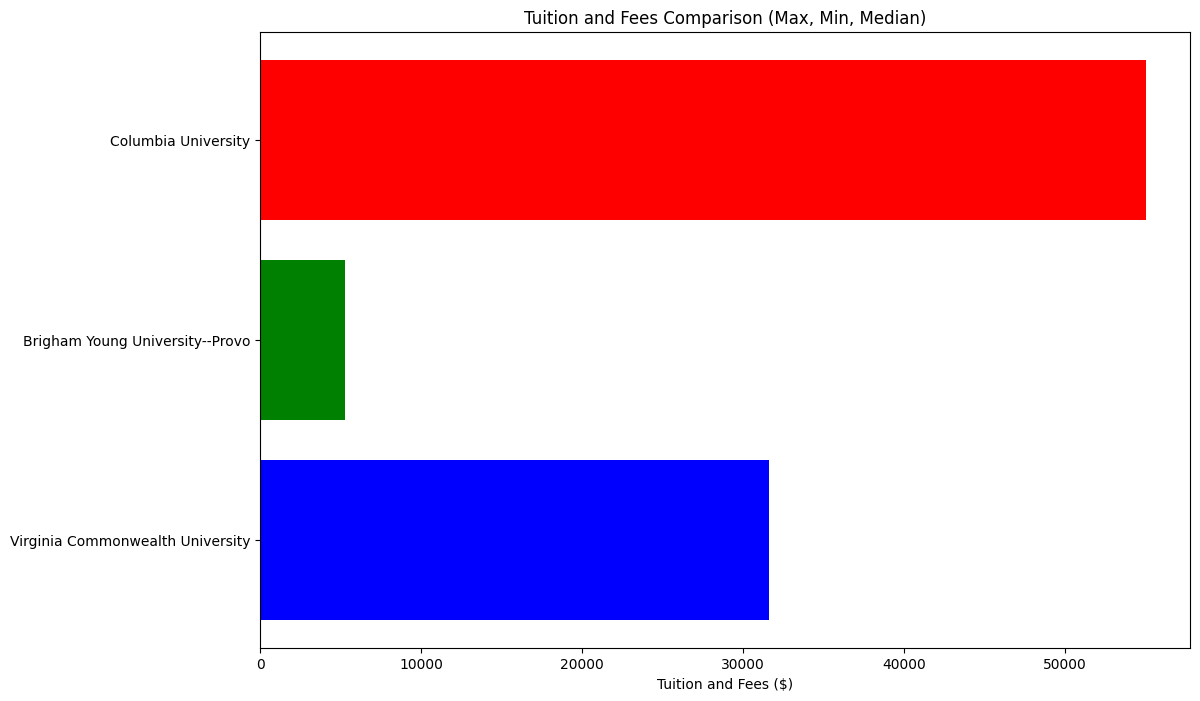

In [64]:
data['Tuition and fees'] = data['Tuition and fees'].str.replace(',', '').str.replace('$', '').astype(float)
max_tuition = data['Tuition and fees'].max()
min_tuition = data['Tuition and fees'].min()
median_tuition = data['Tuition and fees'].median()

filtered_data = data.loc[(data['Tuition and fees'] == max_tuition) |
                         (data['Tuition and fees'] == min_tuition) |
                         (data['Tuition and fees'] == median_tuition)]

plt.figure(figsize=(12, 8))
plt.barh(filtered_data['Name'], filtered_data['Tuition and fees'], color=['red', 'green', 'blue'])
plt.xlabel('Tuition and Fees ($)')
plt.title('Tuition and Fees Comparison (Max, Min, Median)')
plt.gca().invert_yaxis()  # Invert y-axis to display higher tuition at the top
plt.show()


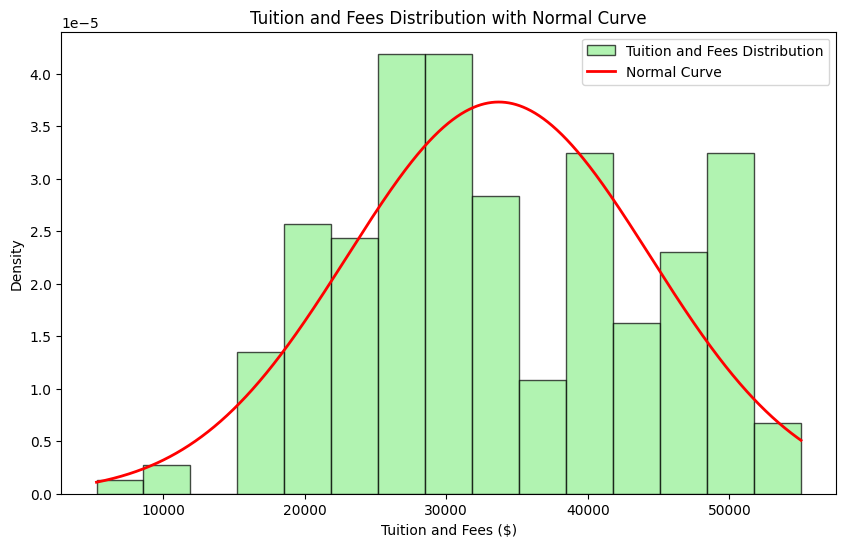

In [67]:
data['Undergrad Enrollment'] = data['Undergrad Enrollment'].str.replace(',', '').astype(float)
mean_tuition = data['Tuition and fees'].mean()
std_tuition = data['Tuition and fees'].std()
x = np.linspace(data['Tuition and fees'].min(), data['Tuition and fees'].max(), 1000)
y = stats.norm.pdf(x, mean_tuition, std_tuition)
plt.figure(figsize=(10, 6))
plt.hist(data['Tuition and fees'], bins=15, density=True, color='lightgreen', edgecolor='black', alpha=0.7, label='Tuition and Fees Distribution')
plt.plot(x, y, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Tuition and Fees ($)')
plt.ylabel('Density')
plt.title('Tuition and Fees Distribution with Normal Curve')
plt.legend()
plt.show()


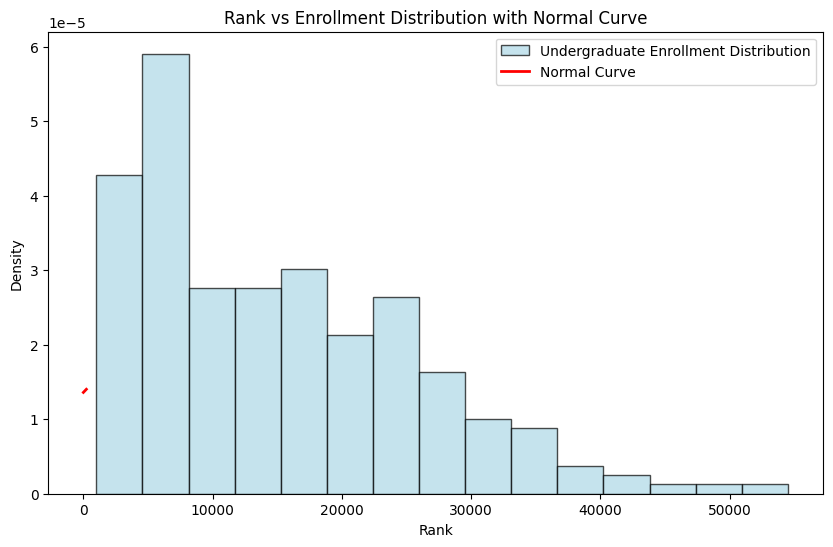

In [68]:
mean_enrollment = data['Undergrad Enrollment'].mean()
std_enrollment = data['Undergrad Enrollment'].std()
x = np.linspace(data['index'].min(), data['index'].max(), 1000)
y = stats.norm.pdf(x, mean_enrollment, std_enrollment)

plt.figure(figsize=(10, 6))
plt.hist(data['Undergrad Enrollment'], bins=15, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Undergraduate Enrollment Distribution')
plt.plot(x, y, 'r-', linewidth=2, label='Normal Curve')

plt.xlabel('Rank')
plt.ylabel('Density')
plt.title('Rank vs Enrollment Distribution with Normal Curve')
plt.legend()
plt.show()


In [69]:
STATEWISE_RENT = pd.read_csv("/content/drive/MyDrive/Project3_Outlines/DAV Project#3/US rent Statewise - Sheet1.csv")
STATEWISE_RENT['Average Rent'] = STATEWISE_RENT['Average Rent'].str.replace('$', '').str.replace(',', '').astype(float)
STATEWISE_RENT['Average Apartment Size'] = STATEWISE_RENT['Average Apartment Size'].str.replace(' sq. ft.', '').str.replace(',', '').astype(float)
STATEWISE_RENT['Rate per sqft'] = STATEWISE_RENT['Average Rent'] / STATEWISE_RENT['Average Apartment Size']
STATEWISE_RENT['Rate per sqft'] = STATEWISE_RENT['Rate per sqft']*1000
STATEWISE_RENT['State'] = STATEWISE_RENT['State'].str.lower()

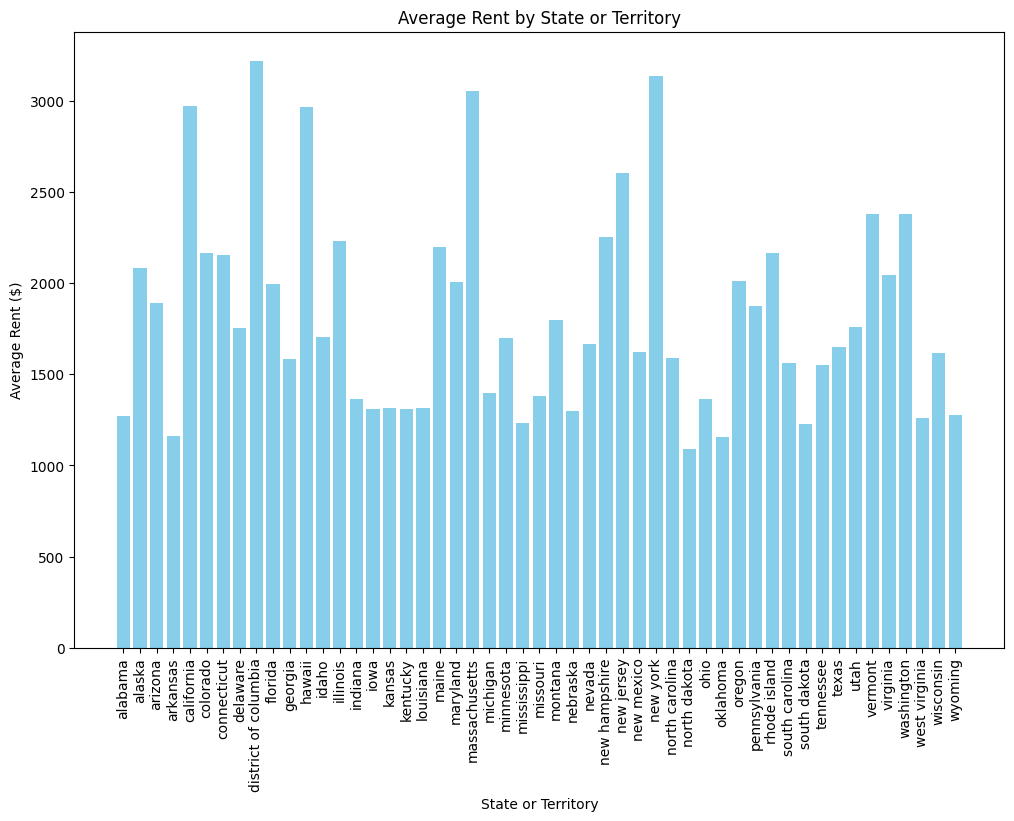

In [70]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(STATEWISE_RENT['State'], STATEWISE_RENT['Rate per sqft'], color='skyblue')
plt.xlabel('State or Territory')
plt.ylabel('Average Rent ($)')
plt.title('Average Rent by State or Territory')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [71]:
STATEWISE_RENT.to_csv("Statewise_rent.csv")

In [72]:
Crime_Index = pd.read_csv("/content/drive/MyDrive/Project3_Outlines/DAV Project#3/state_crime.csv")
Crime_Index['State'] = Crime_Index['State'].str.lower()
state_avg = Crime_Index.groupby('State').mean()
#state_avg['State'] = state_avg['State'].str.lower()

In [73]:
state_avg['Percentage Violent Crimes'] = (state_avg['Data.Totals.Violent.All'] / state_avg['Data.Totals.Property.All']) * 100
state_avg['Percentage Property Crimes'] = ((state_avg['Data.Totals.Property.All'] - state_avg['Data.Totals.Violent.All']) / state_avg['Data.Totals.Property.All']) * 100

print(state_avg[['Percentage Violent Crimes', 'Percentage Property Crimes']])

state_avg.to_csv("State_Crime.csv")

                      Percentage Violent Crimes  Percentage Property Crimes
State                                                                      
alabama                               13.532843                   86.467157
alaska                                14.902812                   85.097188
arizona                               10.064980                   89.935020
arkansas                              12.722047                   87.277953
california                            14.746677                   85.253323
colorado                               9.326359                   90.673641
connecticut                            9.184622                   90.815378
delaware                              13.131489                   86.868511
district of columbia                  26.223846                   73.776154
florida                               14.869801                   85.130199
georgia                               11.776887                   88.223113
hawaii      

In [74]:

state_avg['Percentage Violent Crimes in Total'] = (state_avg['Data.Totals.Violent.All'] / state_avg['Data.Population']) * 100
state_avg['Percentage Property Crimes in Total'] = ((state_avg['Data.Totals.Property.All'] - state_avg['Data.Totals.Violent.All']) / state_avg['Data.Population']) * 100

Crime_Rate  = state_avg
Crime_Rate.to_csv("/content/State_Crime.csv")




Index(['Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery', 'Percentage Violent Crimes',
       'Percentage Property Crimes', 'Percentage Violent Crimes in Total',
       'Percentage Property Crimes in Total'],
      dtype='object')


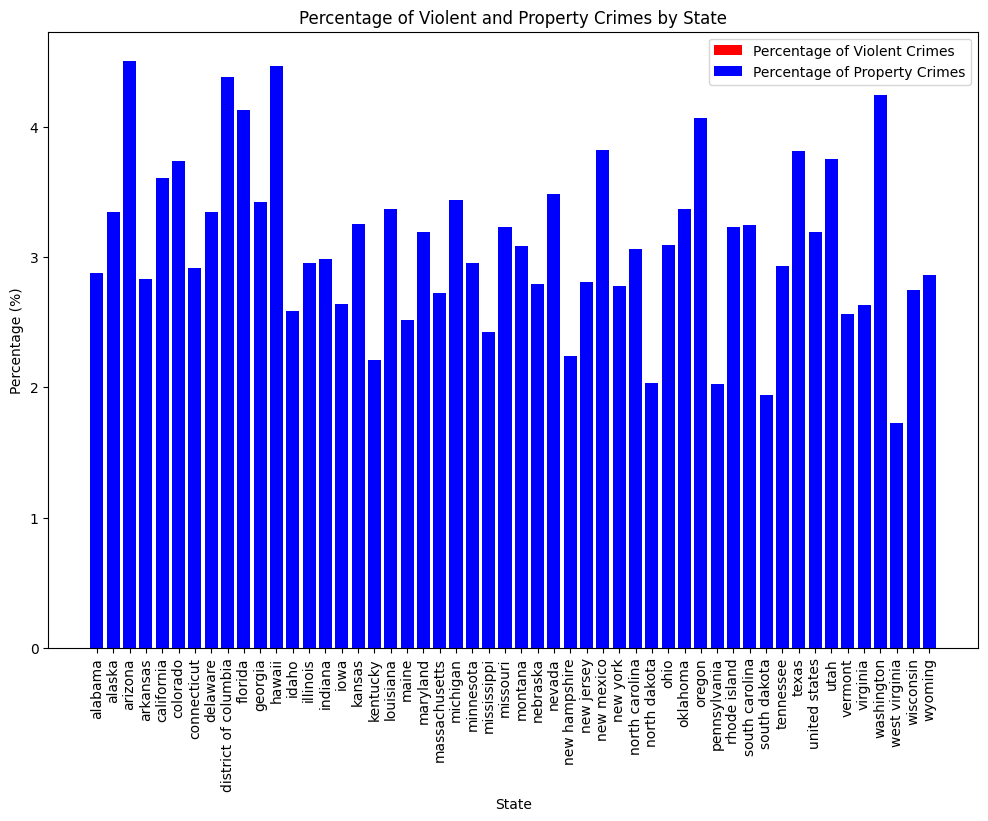

In [75]:
Crime_Rate = pd.read_csv("/content/State_Crime.csv")
print(state_avg.columns)

plt.figure(figsize=(12, 8))

plt.bar(Crime_Rate['State'], Crime_Rate['Percentage Violent Crimes in Total'], color='red', label='Percentage of Violent Crimes')

plt.bar(Crime_Rate['State'], Crime_Rate['Percentage Property Crimes in Total'], color='blue', label='Percentage of Property Crimes')

plt.xlabel('State')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Violent and Property Crimes by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


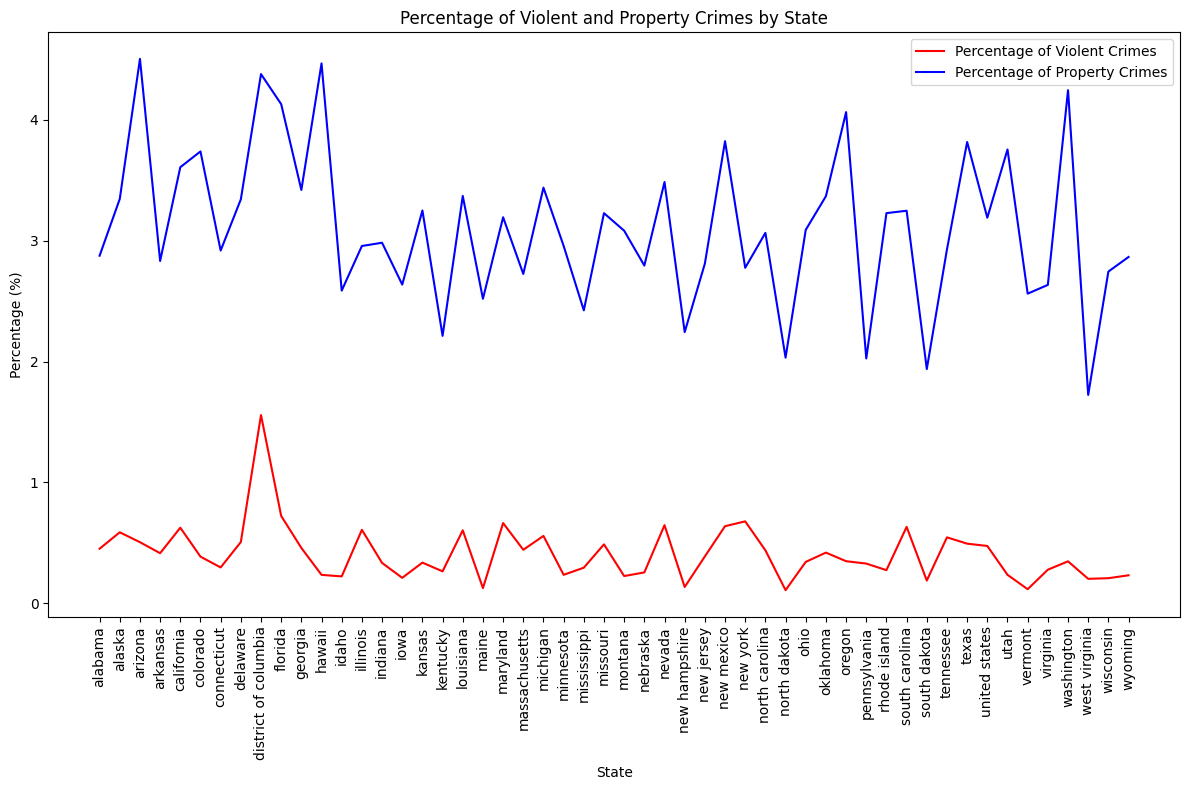

In [76]:
plt.figure(figsize=(12, 8))

plt.plot(Crime_Rate['State'], Crime_Rate['Percentage Violent Crimes in Total'], color='red', label='Percentage of Violent Crimes')

plt.plot(Crime_Rate['State'], Crime_Rate['Percentage Property Crimes in Total'], color='blue', label='Percentage of Property Crimes')

plt.xlabel('State')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Violent and Property Crimes by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [77]:
STATEWISE_RENT = pd.read_csv("/content/drive/MyDrive/Project3_Outlines/DAV Project#3/US rent Statewise - Sheet1.csv")

STATEWISE_RENT['Average Rent'] = STATEWISE_RENT['Average Rent'].str.replace('$', '').str.replace(',', '').astype(float)

STATEWISE_RENT['Average Apartment Size'] = STATEWISE_RENT['Average Apartment Size'].str.replace(' sq. ft.', '').str.replace(',', '').astype(float)

STATEWISE_RENT['Rate per sqft'] = STATEWISE_RENT['Average Rent'] / STATEWISE_RENT['Average Apartment Size']
STATEWISE_RENT['Rate per sqft'] = STATEWISE_RENT['Rate per sqft']*1000
STATEWISE_RENT['State'] = STATEWISE_RENT['State'].str.lower()

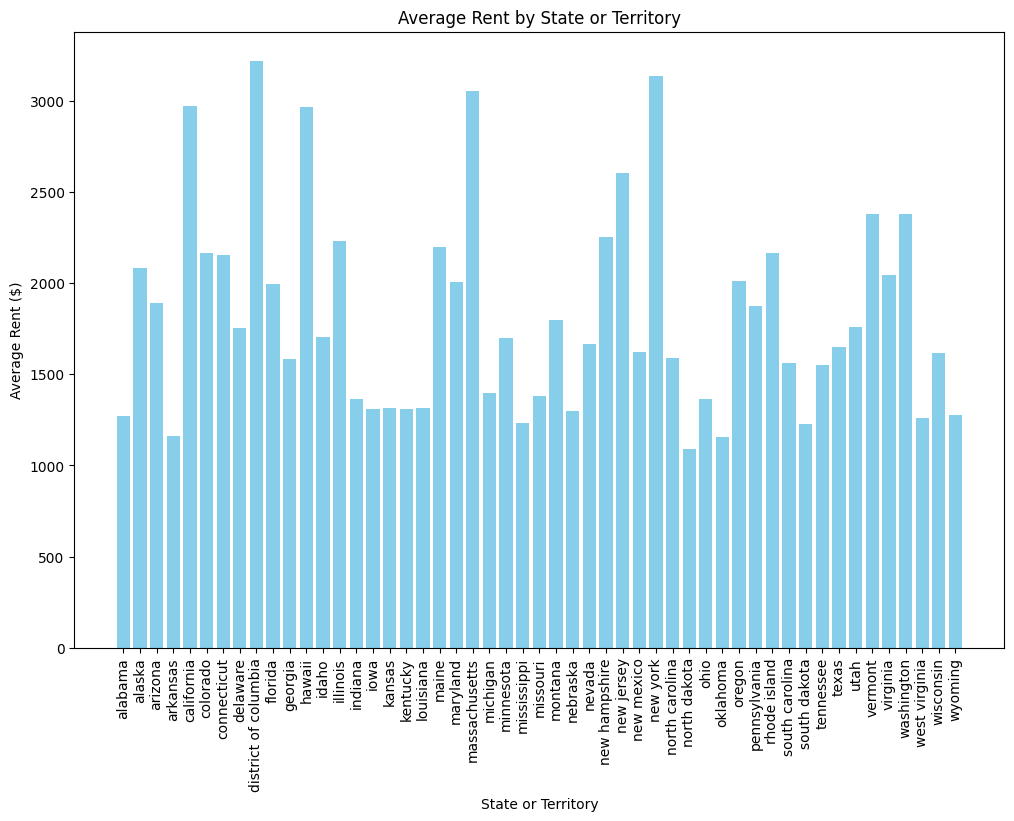

In [78]:
plt.figure(figsize=(12, 8))
plt.bar(STATEWISE_RENT['State'], STATEWISE_RENT['Rate per sqft'], color='skyblue')
plt.xlabel('State or Territory')
plt.ylabel('Average Rent ($)')
plt.title('Average Rent by State or Territory')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [120]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

universities_data = data
Crime_Rate = Crime_Rate
rent = STATEWISE_RENT
state_mapping = {
    'alabama': 'AL',
    'alaska': 'AK',
    'arizona': 'AZ',
    'arkansas': 'AR',
    'california': 'CA',
    'colorado': 'CO',
    'connecticut': 'CT',
    'delaware': 'DE',
    'florida': 'FL',
    'georgia': 'GA',
    'hawaii': 'HI',
    'idaho': 'ID',
    'illinois': 'IL',
    'indiana': 'IN',
    'iowa': 'IA',
    'kansas': 'KS',
    'kentucky': 'KY',
    'louisiana': 'LA',
    'maine': 'ME',
    'maryland': 'MD',
    'massachusetts': 'MA',
    'michigan': 'MI',
    'minnesota': 'MN',
    'mississippi': 'MS',
    'missouri': 'MO',
    'montana': 'MT',
    'nebraska': 'NE',
    'nevada': 'NV',
    'new hampshire': 'NH',
    'new jersey': 'NJ',
    'new mexico': 'NM',
    'new york': 'NY',
    'north carolina': 'NC',
    'north dakota': 'ND',
    'ohio': 'OH',
    'oklahoma': 'OK',
    'oregon': 'OR',
    'pennsylvania': 'PA',
    'rhode island': 'RI',
    'south carolina': 'SC',
    'south dakota': 'SD',
    'tennessee': 'TN',
    'texas': 'TX',
    'utah': 'UT',
    'vermont': 'VT',
    'virginia': 'VA',
    'washington': 'WA',
    'west virginia': 'WV',
    'wisconsin': 'WI',
    'wyoming': 'WY'
}

app = dash.Dash(__name__)

regions = [{'label': region, 'value': region} for region in universities_data['Region'].unique()]
types = [{'label': university_type, 'value': university_type} for university_type in universities_data['Type'].unique()]

app.layout = html.Div([
    html.H1("Top 10 Universities Dashboard"),

    html.Div([
        html.Label("Select Region"),
        dcc.Dropdown(
            id='region-dropdown',
            options=regions,
            value=regions[0]['value']
        )
    ]),

    html.Div([
        html.Label("Select Type"),
        dcc.Dropdown(
            id='type-dropdown',
            options=types,
            value=types[0]['value']
        )
    ]),

    dcc.Graph(id='universities-bar-chart'),
    dcc.Graph(id='universities-scatter-plot'),
    dcc.Graph(id='violent-crime-percentage'),
    dcc.Graph(id='rent-statewise'),
    dcc.Graph(id='mapwise-population')
])

@app.callback(
    Output('universities-bar-chart', 'figure'),
    [Input('region-dropdown', 'value'),
     Input('type-dropdown', 'value')]
)
def update_bar_chart(selected_region, selected_type):
    filtered_data = universities_data[(universities_data['Region'] == selected_region) &
                                      (universities_data['Type'] == selected_type)]
    top_10_universities = filtered_data.sort_values(by='Tuition and fees', ascending=False).head(10)

    fig = px.bar(
        top_10_universities,
        x='Name',
        y='Tuition and fees',
        title='Top 10 Universities',
        labels={'Tuition and fees': 'Tuition and Fees ($)'},
        color='Name'
    )
    return fig

@app.callback(
    Output('universities-scatter-plot', 'figure'),
    [Input('region-dropdown', 'value'),
     Input('type-dropdown', 'value')]
)
def update_scatter_plot(selected_region, selected_type):
    filtered_data = universities_data[(universities_data['Region'] == selected_region) &
                                      (universities_data['Type'] == selected_type)]

    if filtered_data.empty:
        fig = px.scatter(title='No data available')
    else:
        try:
            fig = px.scatter(
                filtered_data,
                x='Undergrad Enrollment',
                y='Tuition and fees',
                title='Enrollment vs Tuition and Fees',
                labels={'Enrollment': 'Enrollment', 'Tuition and fees': 'Tuition and Fees ($)'},
                color='Name'
            )
        except Exception as e:
            print(e)
            fig = px.scatter(title='An error occurred while generating the plot')

    return fig

@app.callback(
    Output('violent-crime-percentage', 'figure'),
    [Input('region-dropdown', 'value')]
)
def update_violent_crime_percentage(selected_region):
    selected_region_data = universities_data[universities_data['Region'] == selected_region]
    selected_states = selected_region_data['State'].unique()
    filtered_crime_data = Crime_Rate[Crime_Rate['State'].isin(selected_states)]

    fig = px.bar(
        filtered_crime_data,
        x='State',
        y='Percentage Violent Crimes in Total',
        title='State-wise Violent Crime Percentage',
        labels={'Percentage Violent Crimes in Total': 'Violent Crime Percentage (%)'},
        color='State'
    )
    return fig


@app.callback(
    Output('rent-statewise', 'figure'),
    [Input('region-dropdown', 'value')])
def update_rent(selected_region):
    selected_region_data = universities_data[universities_data['Region'] == selected_region]
    selected_states = selected_region_data['State'].unique()
    filtered_rent_data = rent[rent['State'].isin(selected_states)]

    fig = px.bar(
        filtered_rent_data,
        x='State',
        y='Rate per sqft',
        title='Rental Rates Statewise',
        labels={'Rate per sqft': 'Rental Rates Statewise'},
        color='State'
    )
    return fig


@app.callback(
    Output('mapwise-population', 'figure'),
    [Input('region-dropdown', 'value')])

def update_rent(selected_region):
    selected_region_data = universities_data[universities_data['Region'] == selected_region]
    selected_states = selected_region_data['State'].unique()
    filtered_crime_data = Crime_Rate[Crime_Rate['State'].str.lower().isin(selected_states)]
    filtered_crime_data['State Abbreviation'] = filtered_crime_data['State'].map(state_mapping)

    fig = px.choropleth(
        filtered_crime_data,
        locations='State Abbreviation',
        locationmode="USA-states",
        color='Data.Population',
        color_continuous_scale='RdBu_r',
        range_color=(filtered_crime_data['Data.Population'].min(), filtered_crime_data['Data.Population'].max()),
        scope="usa",
        labels={'Population': 'Population'},
        title='Population Distribution by State'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>